Detect peaks in audio sample.

In [1]:
from pathlib import Path
import wave, struct
import numpy as np
from scipy.signal import find_peaks
from matplotlib import pyplot as plt

In [2]:
file = Path(Path.cwd().parent, 'ticktocksample.wav')
with wave.open(str(file),'rb') as fp:
    params = fp.getparams()
    frames = []
    for i in range(fp.getnframes()):
        frames.append(struct.unpack("<h", fp.readframes(1)))
data = np.array(frames).flatten()

In [4]:
# absolute and normalize
data_a = np.abs(data, dtype=float)
data_a -= data_a.mean()
data_a /= data_a.std()
print(f"mean: {data_a.mean():.2f} ; std {data_a.std():.2f}")

mean: -0.00 ; std 1.00


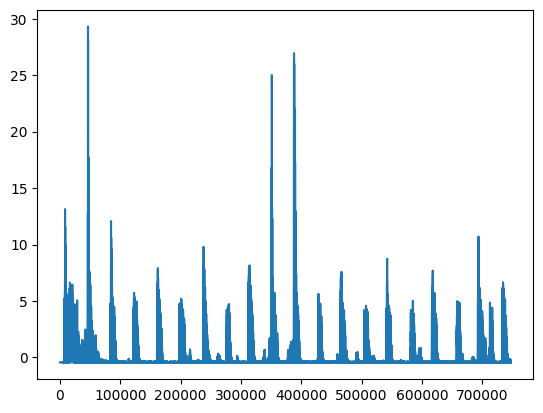

In [5]:
plt.plot(data_a)

In [6]:
peaks, properties = find_peaks(data_a, height=2.5, distance=params.framerate*0.5)

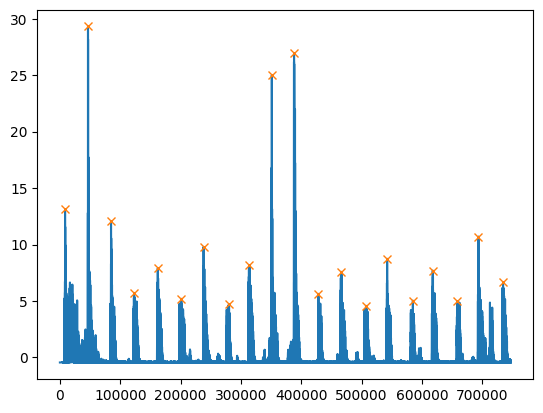

In [7]:
plt.plot(data_a)
plt.plot(peaks, data_a[peaks], "x")

In [8]:
eve_peaks=np.diff(peaks[0::2]).mean()/params.framerate
odd_peaks=np.diff(peaks[1::2]).mean()/params.framerate
print(f"difference between even peaks {eve_peaks*1000:.0f}ms")
print(f"difference between odd  peaks {odd_peaks*1000:.0f}ms")

difference between even peaks 1726ms
difference between odd  peaks 1732ms
